# Choose 4 stocks of your choice and create a notebook with the same visualizations. Provide similar explanations in regard to the meaning of statistics and the shape of each stocks distribution.

### We will build the functions

In [1]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
        
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    #lists of even length divided by 2 have reminder 0
    if n % 2 != 0:
        #list length is odd
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
        
    return median_

def mode(list_obj):
    # use to record value(s) that appear most times
    max_count = 0
    # use to count occurrences of each value in list
    counter_dict = {}
    for value in list_obj:
        # count for each value should start at 0
        counter_dict[value] = 0
    for value in list_obj:
        # add on to the count of the value for each occurrence in list_obj
        counter_dict[value] += 1
    # make a list of the value (not keys) from the dictionary
    count_list = list(counter_dict.values())
    # and find the max value
    max_count = max(count_list)
    # use a generator to make a list of the values (keys) whose number of 
    # occurences in the list match max_count
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(list_obj)
    # use n to calculate average of sum squared diffs
    n = len(list_obj)
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in list_obj:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    # Standard deviation is the square root of variance
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    # determine the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    # instantiate a variable holding the value of 0; this will be used to 
    # sum the values generated in the for loop below
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    # check list lengths are equal
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        # account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        # return covariance
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    

def correlation(list_obj1, list_obj2):
    # corr(x,y) = cov(x, y) / (SD(x) * SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)  
    
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

In [2]:
lst = [1,2,3,4,5,6,7,3,12,15,13]
lst2 = [1,2,3,2,4,6,5,4,6,14, 12]
print("list 1 total:", total(lst))
print("list 2 total:", total(lst2))
print("list 1 mean:", mean(lst))
print("list 2 mean:", mean(lst2))
print("list 1 median:", median(lst))
print("list 2 median:", median(lst2))
print("list 1 mode:", mode(lst))
print("list 2 mode:", mode(lst2))
print("variance:", variance(lst, sample = True))
print("variance (sample):", variance(lst2, sample = False))
print("standard deviation:", SD(lst, sample = True))
print("standard deviation (sample):", SD(lst2, sample = False))
print("covariance:", covariance(lst, lst2))
print("correlation:", correlation(lst, lst2))
print("skewness:", skewness(lst, sample = True))
print("skewness (sample):", skewness(lst2, sample = False))
print("kurtosis:", kurtosis(lst, sample = True))
print("kurtosis (sample):", kurtosis(lst2, sample = False))

list 1 total: 71
list 2 total: 59
list 1 mean: 6.454545454545454
list 2 mean: 5.363636363636363
list 1 median: 5
list 2 median: 4
list 1 mode: [3]
list 2 mode: [2, 4, 6]
variance: 22.872727272727275
variance (sample): 15.50413223140496
standard deviation: 4.782544016810224
standard deviation (sample): 3.9375286959468574
covariance: 16.56198347107438
correlation: 0.9224142037215403
skewness: 0.8090054968478286
skewness (sample): 1.1308864499207032
kurtosis: -0.7609792294866629
kurtosis (sample): 3.0860038825064446


# creates a functions that generates stats for each column of data

In [3]:
def gather_statistics(df, sample = True):
    # create a dictionary of dictionaries with an entry for each column of data in a datafram, df
    dct = {key:{} for key in df}
    # call each column of data and its name (key)
    # df.items makes a list of tuples where tuple index 0 refers to the key, 
    # index 1 refers to object pointed to by key
    for key, val in df.items():
        # inplace = True alters the object itself
        val.dropna(axis = 0, inplace = True)
        dct[key]["mean"] = round(mean(val), 3)
        dct[key]["median"] = round(median(val), 3)
        dct[key]["variance"] = round(variance(val, sample), 3)
        dct[key]["S.D."] = round(SD(val, sample), 3)
        dct[key]["skewness"] = round(skewness(val, sample), 3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample), 3)
        
    stats_df = pd.DataFrame(dct)
    return stats_df

In [4]:
import pandas_datareader.data as web
import datetime
import pandas as pd

start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

print(start, end)

2012-01-01 00:00:00 2021-10-05 15:19:37.034242


In [6]:
data_dict = {}
stocks = ["SQ", "MRNA", "GME", "AMZN"]
for key in stocks:
    data_dict[key] = web.DataReader(key, "yahoo", start, end)

In [7]:
data_dict[key]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2021-09-29,3351.300049,3297.870117,3322.110107,3301.120117,2562300,3301.120117
2021-09-30,3327.850098,3273.989990,3316.000000,3285.040039,2842400,3285.040039
2021-10-01,3309.169922,3255.939941,3289.010010,3283.260010,2835600,3283.260010


In [8]:
data_dict.keys()

dict_keys(['SQ', 'MRNA', 'GME', 'AMZN'])

In [9]:
data_dict.values()

dict_values([                  High         Low        Open       Close    Volume  \
Date                                                                   
2015-11-19   14.780000    9.000000   11.200000   13.070000  47466100   
2015-11-20   14.050000   12.500000   13.920000   12.850000  16550300   
2015-11-23   13.150000   12.100000   13.000000   12.120000   5172200   
2015-11-24   12.230000   11.520000   12.000000   12.020000   4714700   
2015-11-25   12.400000   11.850000   12.120000   11.900000   3583400   
...                ...         ...         ...         ...       ...   
2021-09-29  246.240005  235.220001  245.520004  236.039993   7323700   
2021-09-30  243.270004  236.270004  236.690002  239.839996   5464100   
2021-10-01  242.050003  236.880005  239.440002  239.289993   5934600   
2021-10-04  236.285004  222.919998  235.610001  226.250000  12376700   
2021-10-05  239.139999  226.259995  226.910004  235.979996   9552886   

             Adj Close  
Date                    


In [10]:
close_data = pd.concat([val["Close"] for val in data_dict.values()], 
                       keys = data_dict.keys(), 
                       axis = 1)
close_data

,SQ,MRNA,GME,AMZN
Date,,,,
2012-01-03,NaN,NaN,23.790001,179.029999
2012-01-04,NaN,NaN,24.129999,177.509995
2012-01-05,NaN,NaN,25.260000,177.610001
2012-01-06,NaN,NaN,24.870001,182.610001
2012-01-09,NaN,NaN,23.990000,178.559998
...,...,...,...,...
2021-09-29,236.039993,378.899994,175.919998,3301.120117
2021-09-30,239.839996,384.859985,175.470001,3285.040039
2021-10-01,239.289993,341.089996,176.910004,3283.260010


Text(0.5, 1.0, 'Close\nDaily Stock Prices ')

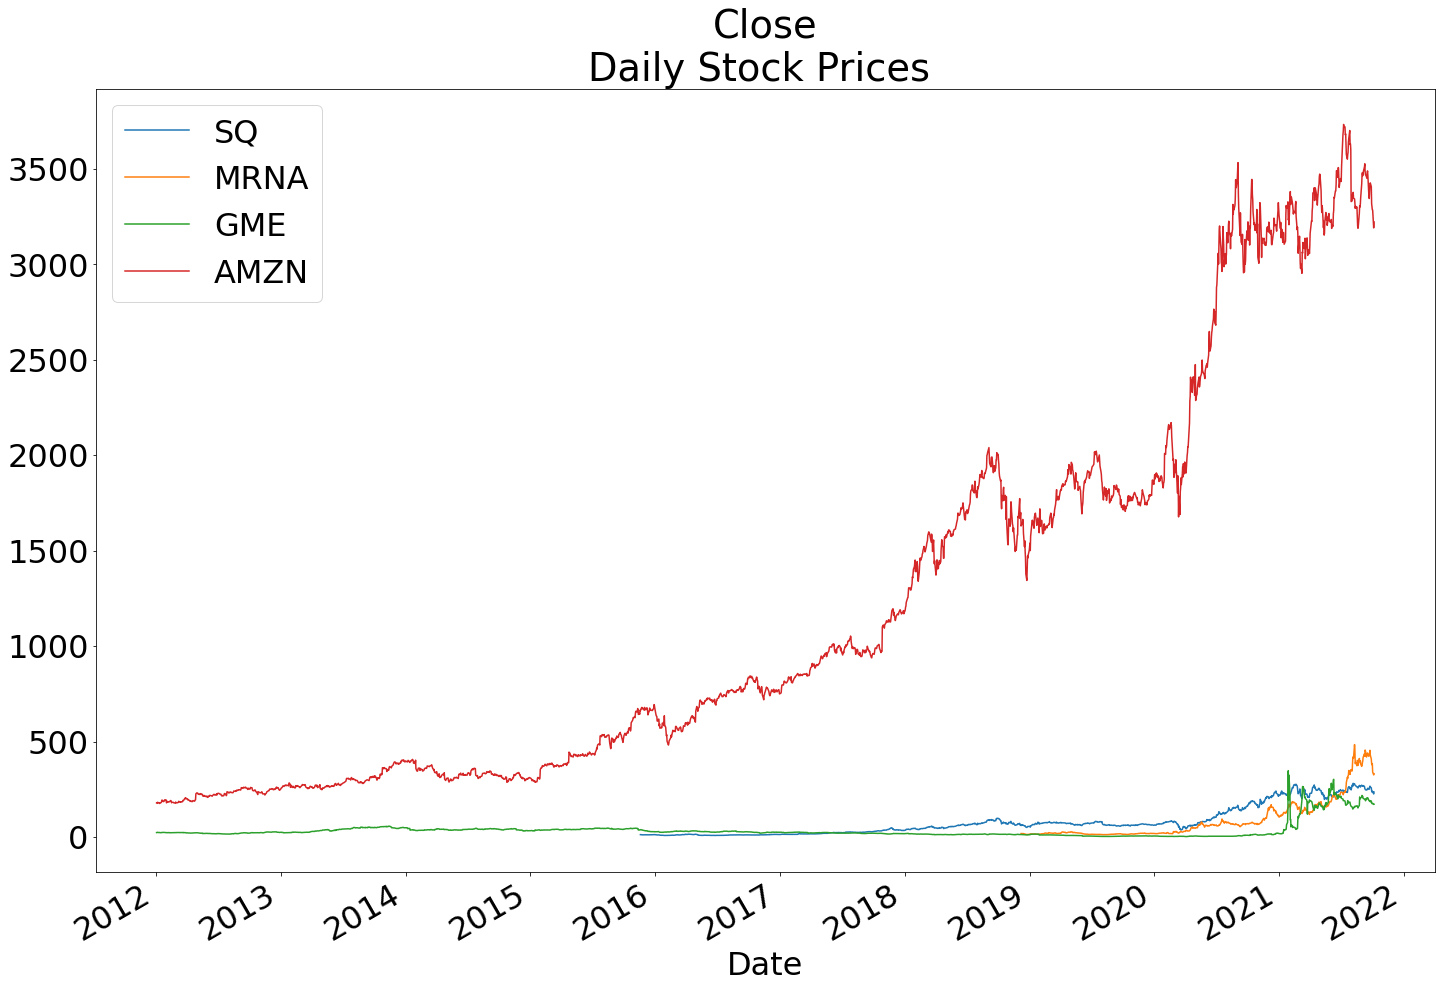

In [11]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Close\nDaily Stock Prices ")

### It is helpful to log the y axis ti view change in terms of proportion

<ipython-input-12-06bd7b00ad49>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])


[Text(0, 0.1, '0.1'),
 Text(0, 1.0, '1'),
 Text(0, 10.0, '10'),
 Text(0, 100.0, '100'),
 Text(0, 1000.0, '1000'),
 Text(0, 10000.0, '10000'),
 Text(0, 100000.0, '100000')]

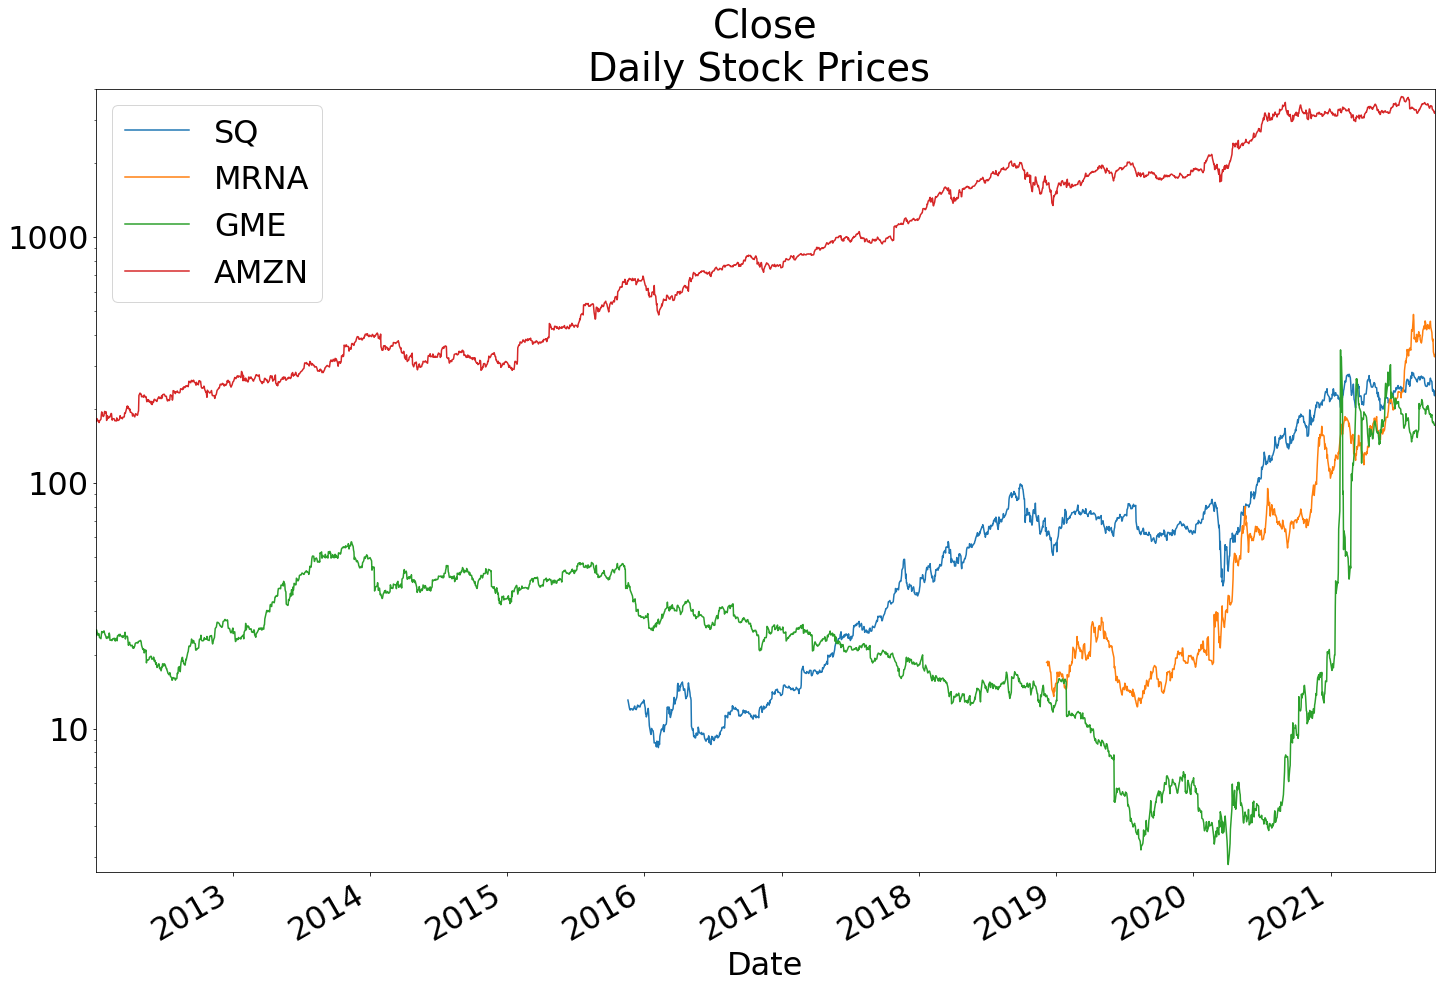

In [12]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":32})
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = .01
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Close\nDaily Stock Prices ")
ax.set_yscale("log")
# reset y-ticklabels so that they are not in scientific notation
y_vals = ax.get_yticks()
# transform values into integers, set as new ytick values
ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])

In [13]:
# pct_change give percent as decimal. Transform to percent as whole number
price_change_data = close_data.pct_change() * 100

<ipython-input-14-20736107244c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


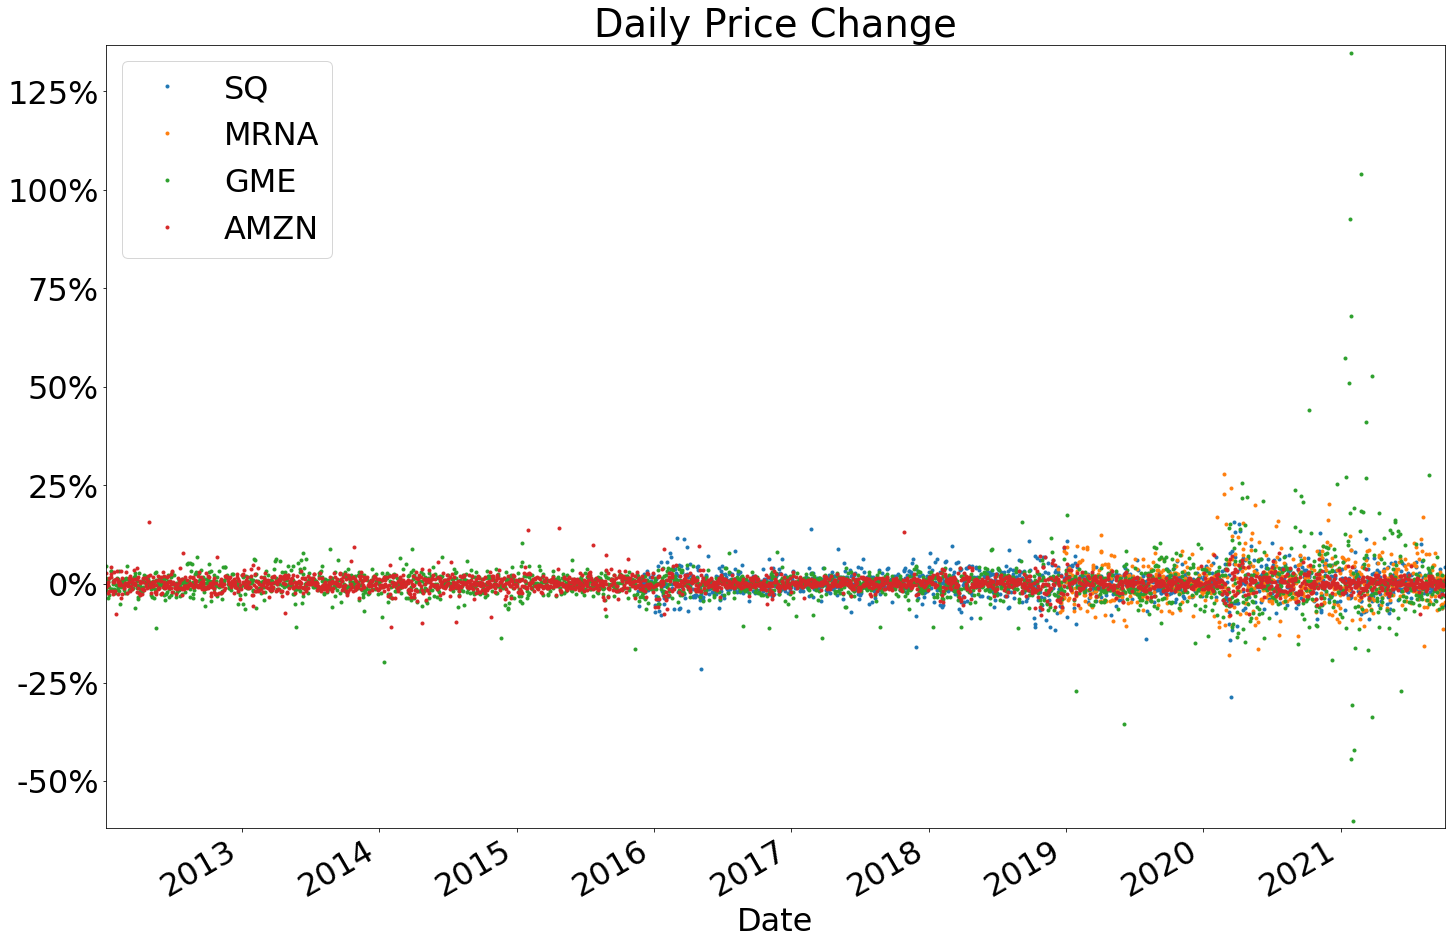

In [14]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Daily Price Change")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

In [15]:
stats_df = gather_statistics(price_change_data, sample = True)
stats_df

,SQ,MRNA,GME,AMZN
mean,0.254,0.534,0.257,0.136
median,0.306,0.126,0.047,0.113
variance,11.352,26.257,41.490,3.646
S.D.,3.369,5.124,6.441,1.909
skewness,-0.568,0.679,7.445,0.552
kurtosis,6.930,2.967,139.665,8.209


<ipython-input-18-855d720df2fb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
<ipython-input-18-855d720df2fb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


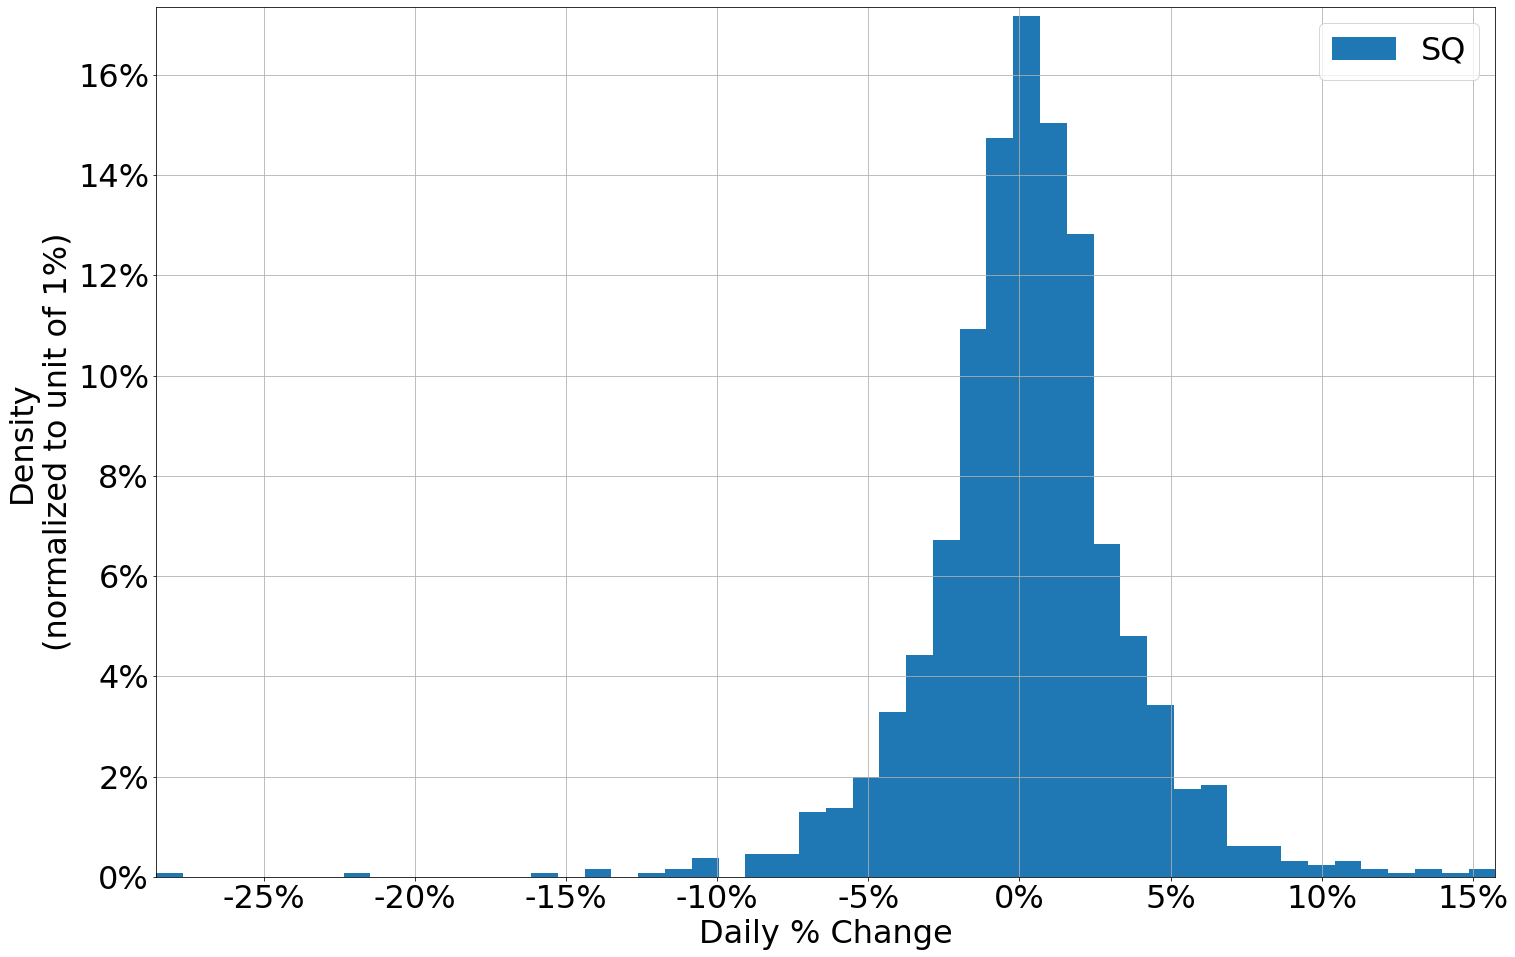

In [18]:
fig, ax = plt.subplots(figsize = (24,16))
price_change_data["SQ"].hist(bins = 50,
                               density = True,
                               label = "SQ")

x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
ax.set_xlabel("Daily % Change")

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
ax.set_ylabel("Density\n(normalized to unit of 1%)")

plt.legend()
plt.show()

## create a figure with 4 density distribution plots

array([<AxesSubplot:title={'center':'SQ'}>,
       <AxesSubplot:title={'center':'MRNA'}>,
       <AxesSubplot:title={'center':'GME'}>,
       <AxesSubplot:title={'center':'AMZN'}>], dtype=object)

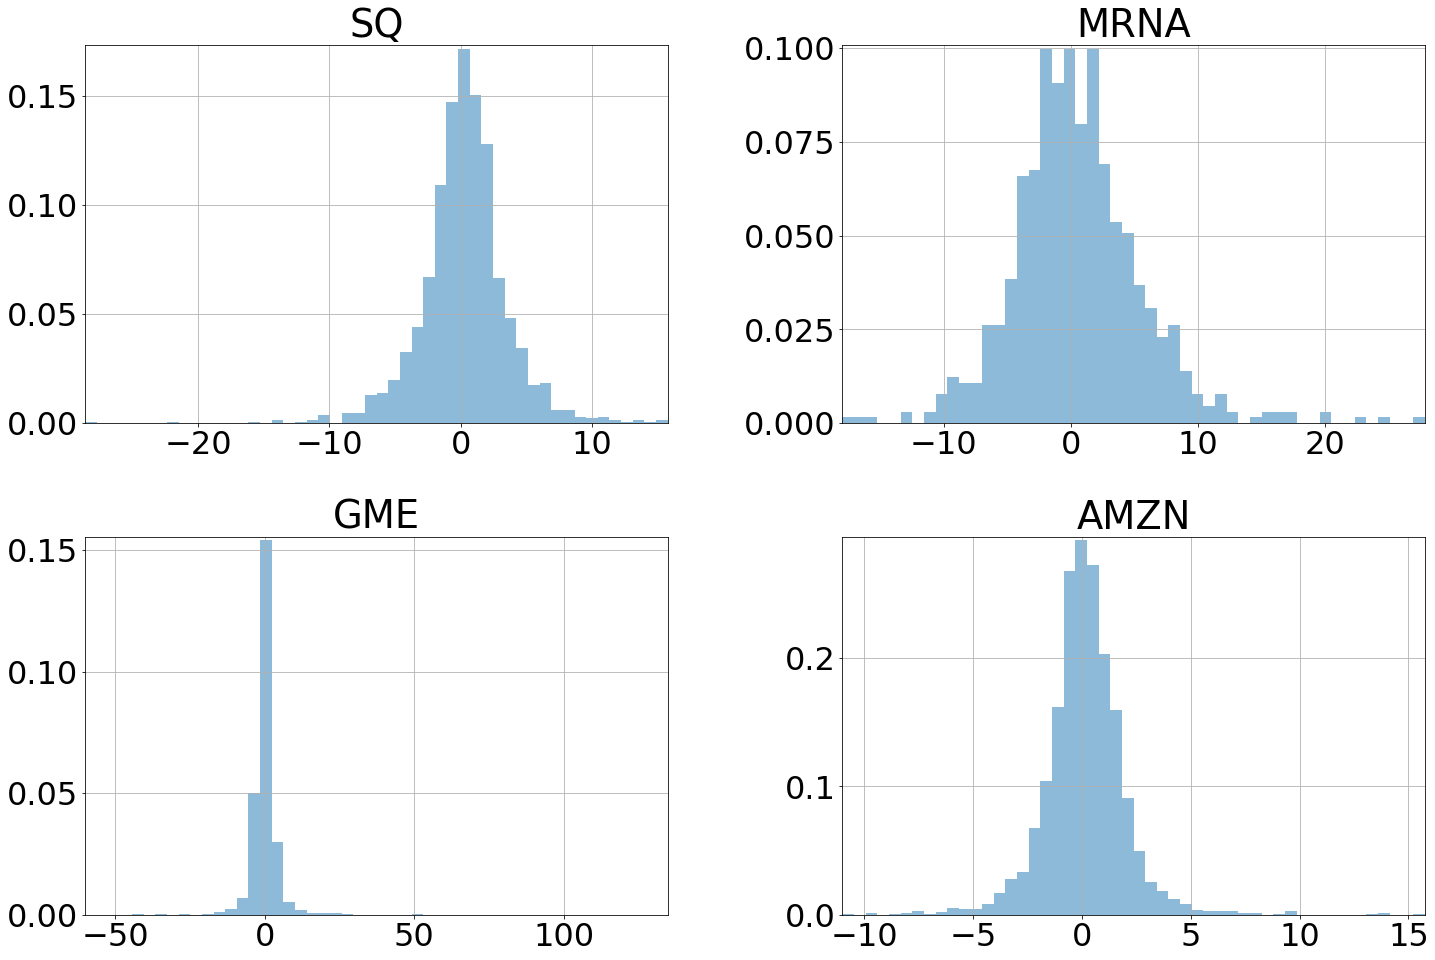

In [19]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
price_change_data.hist(bins = 50,
                       alpha = .5,
                       label = price_change_data.keys(),
                       density = True,
                       ax = ax)

## Trasnform axis tick labels

<ipython-input-20-5c5cd5b6660f>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
<ipython-input-20-5c5cd5b6660f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


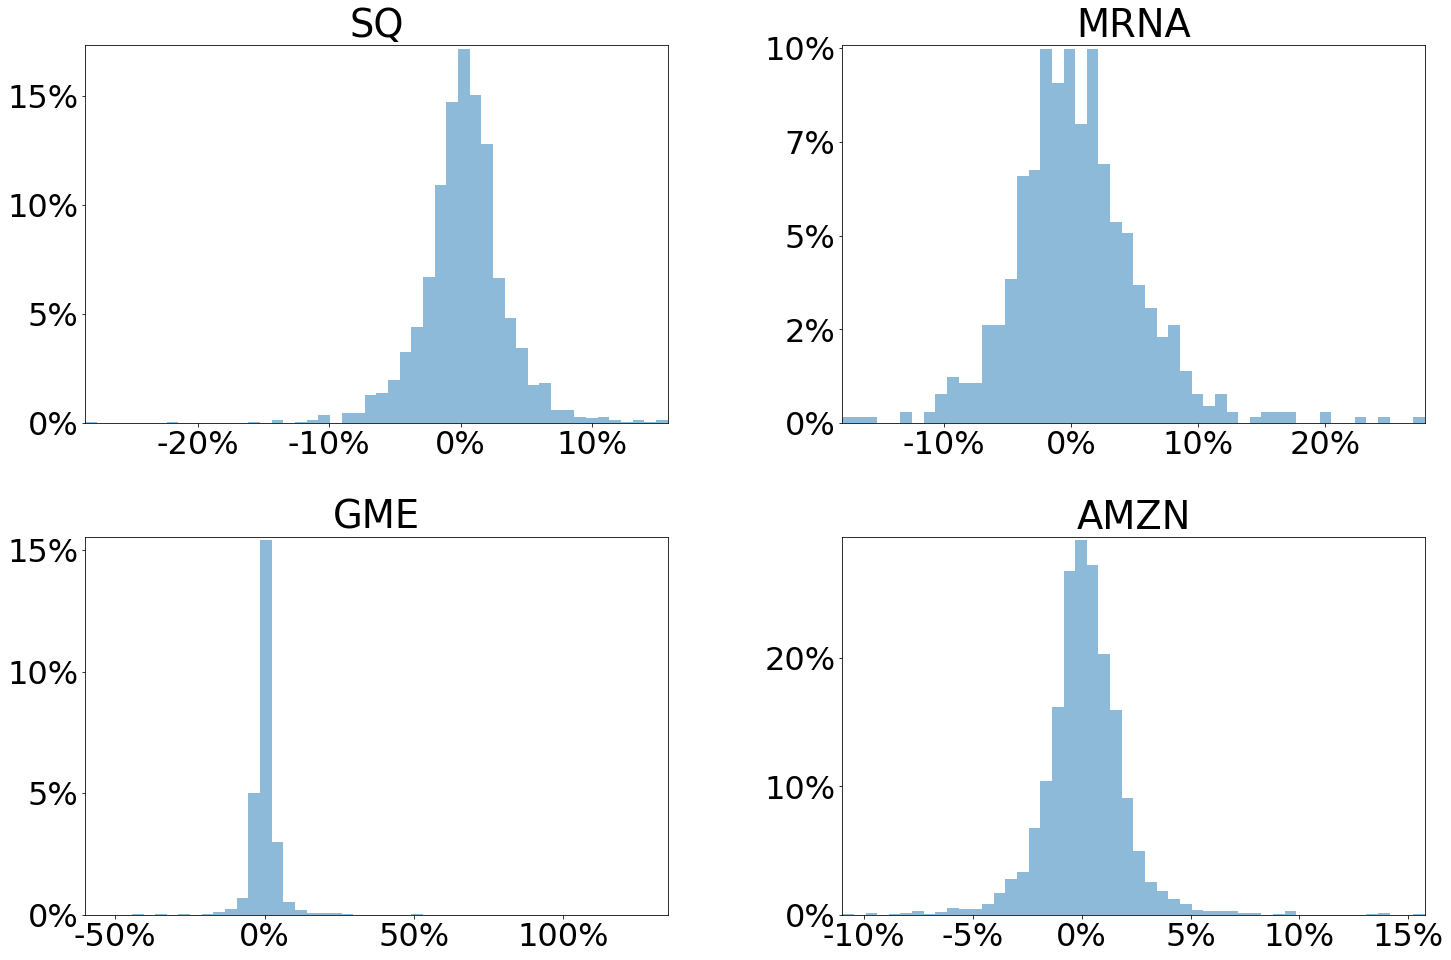

In [20]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
price_change_data.hist(bins = 50,
                       alpha = .5,
                       label = price_change_data.keys(),
                       density = True,
                       ax = ax)
for i in range(len(ax)):
    for j in range(len(ax[i])):
        # identify object in ax that is the graph of interest
        a = ax [i][j]
        # identify name for stock data plotted
        stock = a.get_title()
        # set title as stock name
        a.set_title(stock)
        # resformat x and y tick values
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
        
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
        
        a.grid(False)

<ipython-input-21-28cfd4e48dae>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
<ipython-input-21-28cfd4e48dae>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


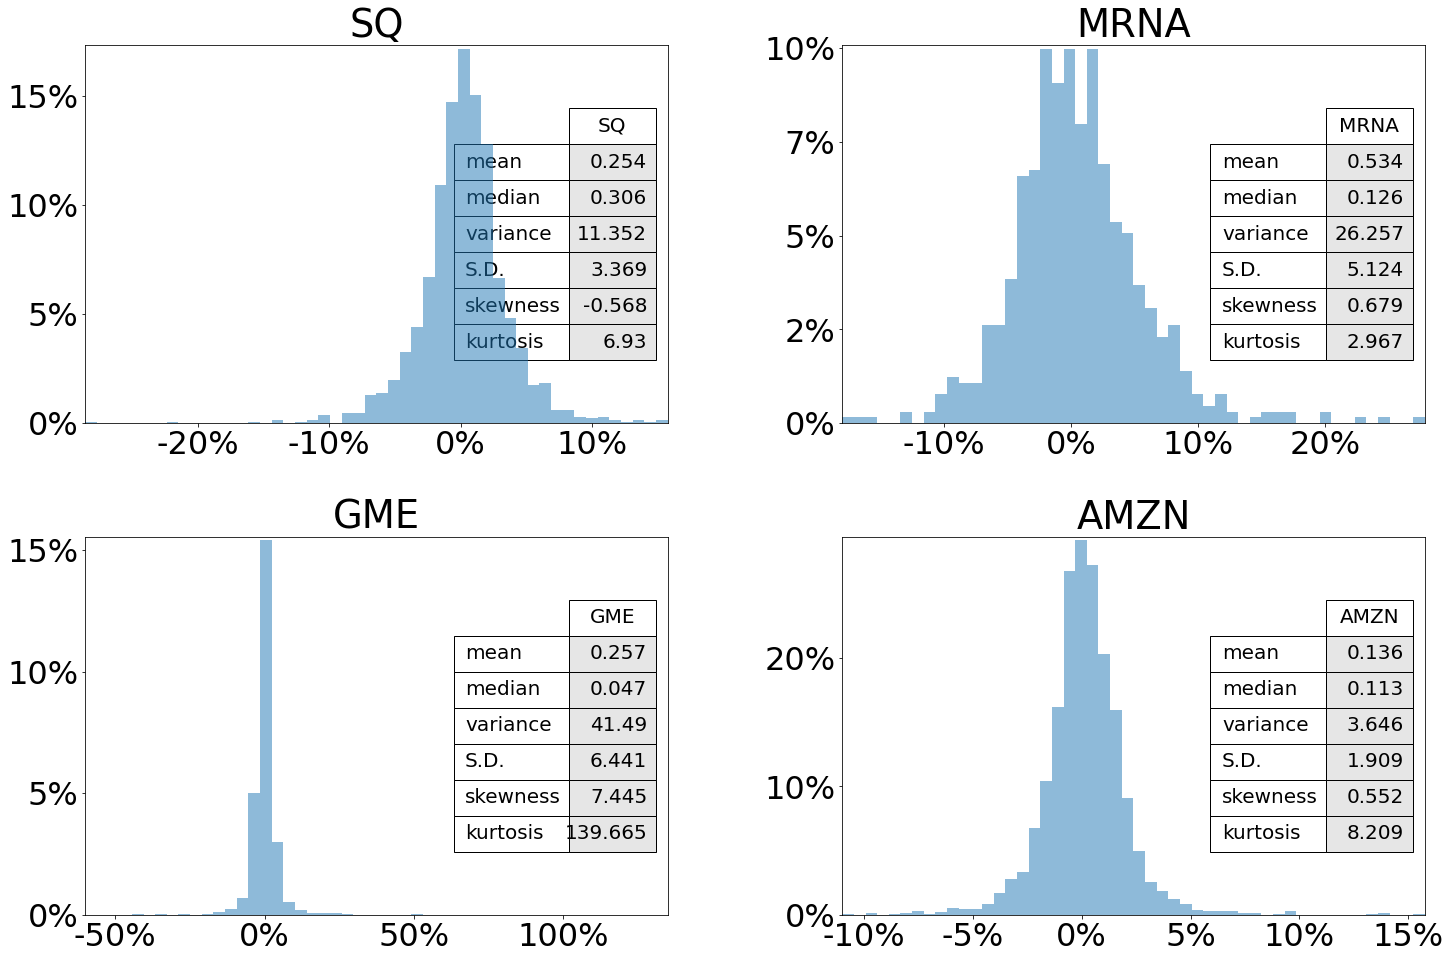

In [21]:
from pandas.plotting import table

fig, ax = plt.subplots(2,2, figsize = (24,16))
price_change_data.hist(bins = 50,
                       alpha = .5,
                       label = price_change_data.keys(),
                       density = True,
                       ax = ax)
for i in range(len(ax)):
    for j in range(len(ax[i])):
        # identify object in ax that is the graph of interest
        a = ax [i][j]
        # identify name for stock data plotted
        stock = a.get_title()
        # set title as stock name
        a.set_title(stock)
        # resformat x and y tick values
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
        a.grid(False)

        hist_data = stats_df[stock]
        stats_table = table(a,
                            hist_data,
                            colWidths = [.1],
                            cellColours = [[(.9,.9,.9)]] * 6,
                            loc = "center right")
        stats_table.scale(1.5,3)
        stats_table.auto_set_font_size(False)
        stats_table.set_fontsize(20)

<ipython-input-25-be265e0695ed>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-25-be265e0695ed>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


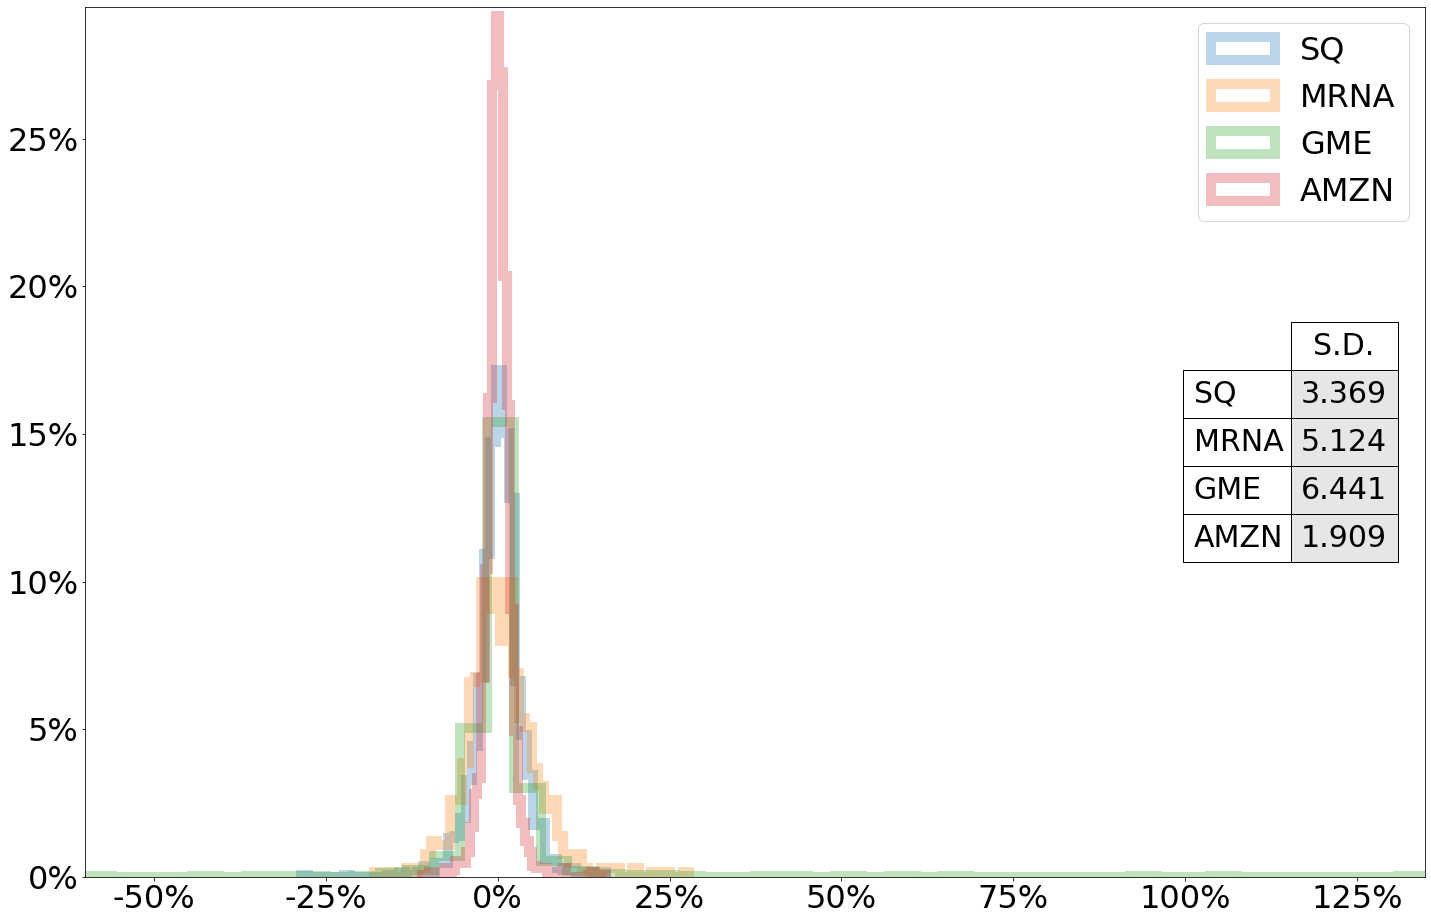

In [25]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", 
                                alpha = .3, label = key, linewidth = 10, 
                                density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)


plt.legend()

<ipython-input-23-1785a2208ccd>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-23-1785a2208ccd>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


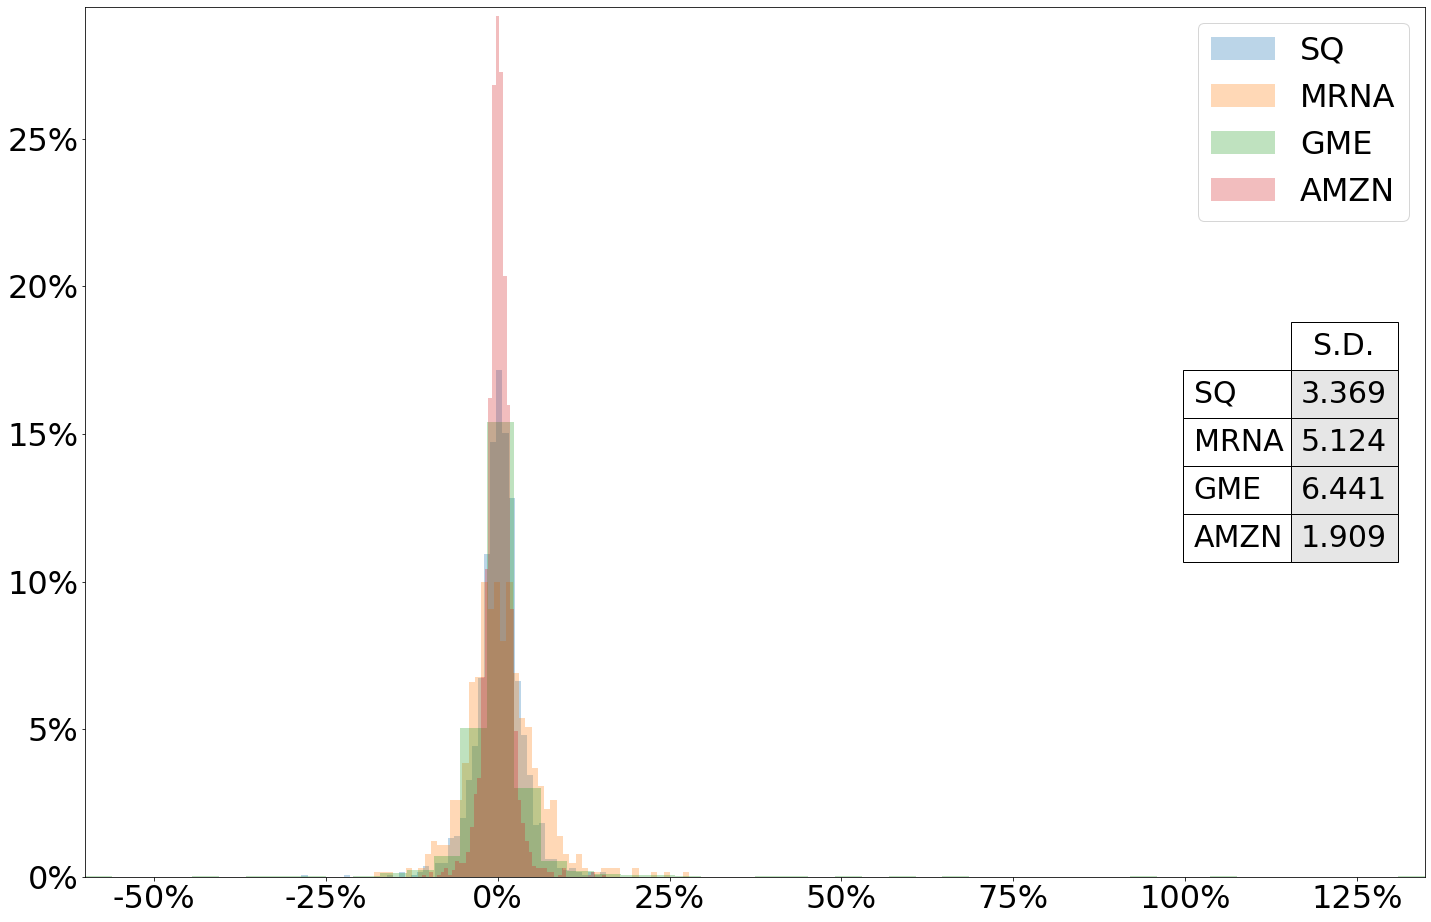

In [23]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, 
                                alpha = .3, label = key, linewidth = 10, 
                                density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)


plt.legend()